In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


##### Lets generate a random observations which follows a linear pattern.

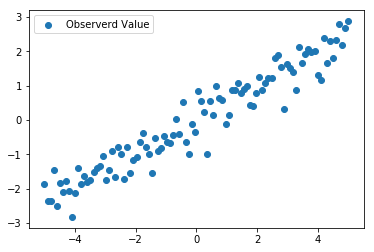

In [134]:
# Lets generate some random linear observations.
m = 0.5
c = 0.1
x_train = np.linspace(-5,5,num=100)[:,None]
y_train =  m*x_train + c + 0.4*np.random.randn(100,1) 

plt.scatter(x_train,y_train) 

plt.legend(['Observerd Value'])

plt.show()

##### To understand the line wrt the above linear pattern we need to determine the cost and the partial derivatives of the parameters (m - slope and c - intercept) of the line 

A linear equation can be given by 
\begin{align}
f(x) & = \theta_0 + \theta_1x_1 + \theta_2x_2 ... + \theta_nx_n
\end{align}


The linear equation can be written in terms of vectors as $f_\theta(x) = \theta^TX$, and the cost of the equation is given by

\begin{equation*}
cost(f_\theta(x),y) = \frac{1}{n} ( \sum_{i=1}^n  \left( f_\theta(x_i) - y_i  \right)^2  )
\end{equation*}

We have to calculate the partial derivative of the cost function as follows

\begin{equation*}
\frac{\partial cost(f_\theta(x),y)}{\partial \theta_0}, \frac{\partial cost(f_\theta(x),y)}{\partial \theta_1} to .... \frac{\partial cost(f_\theta(x),y)}{\partial \theta_n}
\end{equation*}

Also represented as 

\begin{equation*}
\nabla f_\theta(x) = (\frac{\partial f_\theta(x)}{\partial \theta_0}, \frac{\partial f_\theta(x)}{\partial \theta_1})
\end{equation*}

A very good source to understand the parital derivative is

https://math.stackexchange.com/questions/70728/partial-derivative-in-gradient-descent-for-two-variables 

In case of two parameter ($\theta_0$ and $\theta_1$) linear equation the partial derivative with respect to $\theta_0$ and $\theta_1$ can be given by 

\begin{equation*}
\frac{\partial}{\partial\theta_0} cost(f_\theta(x),y) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i)-y_i)
\end{equation*}

\begin{equation*}
\frac{\partial}{\partial\theta_1} cost(f_\theta(x),y) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x_i)-y_i)x_i.
\end{equation*}


If we consider f(x) = mx + c as a linear equation then the cost is given by  cost($f(x_i),y_i) = \frac{1}{2}\sqrt{((mx_i + c) - y_i )^2}$ and the partial derivative with respect to parameter m and c can be given by following


\begin{split}f'(x) =
   \begin{bmatrix}
     \frac{{\partial}f(x)}{{\partial}m}\\
     \frac{{\partial}f(x)}{{\partial}c}\\
    \end{bmatrix}
=
   \begin{bmatrix}
     \frac{1}{N} \sum -x_i(y_i - (mx_i + c) \\
       \frac{1}{N} \sum -(y_i - (mx_i + c) \\
    \end{bmatrix}\end{split}
    
We can utilize the partial derivative to identify the delta_m and delta_c in the following LinRegression class


In [131]:
# Build Actual Linear Regression class.
class LinRegression:
    
    m = 0.8 # This slope is a random number, ideally should be less than 1.0 
    c = 0.1 # Random value intercept 
    r = 0.1 # Random value learning rate
    
    def fit(self,x_train,y_train):
        N = len(x_train)
        for i in range(25):
            delta_m = np.sum(-1 * x_train * (y_train - (m*x_train + c))) * (1/N)
            delta_c = np.sum(-1 * (y_train - (m*x_train + c))) * (1/N)
            
            self.m = self.m - self.r * delta_m
            self.c = self.c - self.r * delta_c
            error = np.sqrt(np.sum((y_train - (self.m*x_train+self.c))**2)*(1/N))
            
#             print("Iteration :"+str(i),end=" ")
#             print("m : %.4f, c : %.4f, error : %.4f" % (self.m,self.c,error))
    
    def predict(self,x_test):
        return (self.m*x_test + self.c)
    
    

In [135]:
# Fit the observations in the model build above.
linreg = LinRegression()
linreg.fit(x_train,y_train)

print(linreg.m)
print(linreg.c)

0.3575463634003039
-0.12713724156478942


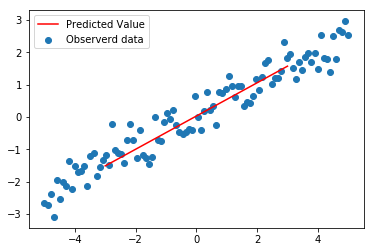

In [133]:
# Predict the line which fits the best to the observations.

x_test = np.linspace(-3,3)
y_test = linreg.predict(x_test[:,None])

plt.scatter(x_train,y_train)
plt.plot(x_test,y_test,color='red')
plt.legend(['Predicted Value','Observerd data'])
